### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading the code and doing basic analysis

In [2]:
df = pd.read_csv('imdb_top_1000.csv')
df.shape

(1000, 16)

In [3]:
df.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [4]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [5]:
df.drop(columns = 'Star1 Star2 Star3 Star4'.split(), axis =1, inplace = True)

In [6]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


### EDA

In [7]:
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
No_of_Votes        0
Gross            169
dtype: int64

In [8]:
df["Certificate"].mode()

0    U
Name: Certificate, dtype: object

In [9]:
df['Certificate'].fillna(df['Certificate'].mode()[0], inplace=True)
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
No_of_Votes        0
Gross            169
dtype: int64

In [10]:
df['Meta_score'].fillna(10*df['IMDB_Rating'], inplace=True)
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
No_of_Votes        0
Gross            169
dtype: int64

In [11]:
df.dropna(subset=['Gross'], how='all', inplace=True)
df.shape

(831, 12)

In [12]:
df.isna().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
No_of_Votes      0
Gross            0
dtype: int64

In [13]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,831.000000,831.000000,8.310000e+02
mean,7.946931,77.765343,3.152499e+05
std,0.283204,11.919370,3.436443e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,71.000000,7.143000e+04
50%,7.900000,79.000000,1.867340e+05
75%,8.100000,85.500000,4.457210e+05
max,9.300000,100.000000,2.343110e+06


In [14]:
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '2007', '1984',
       '1981', '1979', '1964', '1940', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1971', '1965', '1962', '1959', '1958',
       '1952', '1948', '1944', '1941', '1927', '1921', '2015', '2013',
       '2005', '1989', '1963', '1955', '1950', '1925', '1924', '1996',
       '1982', '1978', '1967', '1951', '1949', '1939', '1937', '1934',
       '1928', '1926', '1970', '1969', '1961', '1946', '1930', '1956',
       '1947', '1945', '1938', '1935', '1933', 'PG', '1953'], dtype=object)

In [15]:
df = df.drop(df[df['Released_Year'] == 'PG'].index)
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '2007', '1984',
       '1981', '1979', '1964', '1940', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1971', '1965', '1962', '1959', '1958',
       '1952', '1948', '1944', '1941', '1927', '1921', '2015', '2013',
       '2005', '1989', '1963', '1955', '1950', '1925', '1924', '1996',
       '1982', '1978', '1967', '1951', '1949', '1939', '1937', '1934',
       '1928', '1926', '1970', '1969', '1961', '1946', '1930', '1956',
       '1947', '1945', '1938', '1935', '1933', '1953'], dtype=object)

In [16]:
df['IMDB_Rating'].unique()

array([9.3, 9.2, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. ,
       7.9, 7.8, 7.7, 7.6])

In [17]:
df['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Adventure, Comedy, Sci-Fi',
       'Horror, Mystery, Thriller', 'Drama, Romance, War',
       'Comedy, Drama, Family', 'Animation, Drama, Fantasy',
       'Action, Biography, Drama', 'Animation, Action, Adventure',
       'Drama, Western', 'Action, Adventure', 'Comedy, Drama',
       'Drama, Family', 'Drama, Mystery, Thril

In [18]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
No_of_Votes        int64
Gross             object
dtype: object

In [19]:
df.drop(columns = ['Poster_Link','Series_Title','Overview'],axis=1,inplace=True)

### Feature Extraction

In [20]:
df['Released_Year'] = df['Released_Year'].astype(int)
df = df.astype({"Runtime": str})
df['Runtime']=df['Runtime'].str.replace(' min','')
df = df.astype({"Runtime": int})
df = df.astype({"Gross": str})
df['Gross']=df['Gross'].str.replace(',','')
df["Gross"] = df["Gross"].apply(pd.to_numeric)
df = df.astype({"Gross": int})
df = df.apply(pd.to_numeric, errors='ignore')
df.dtypes

Released_Year      int32
Certificate       object
Runtime            int32
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
No_of_Votes        int64
Gross              int32
dtype: object

### Visualization

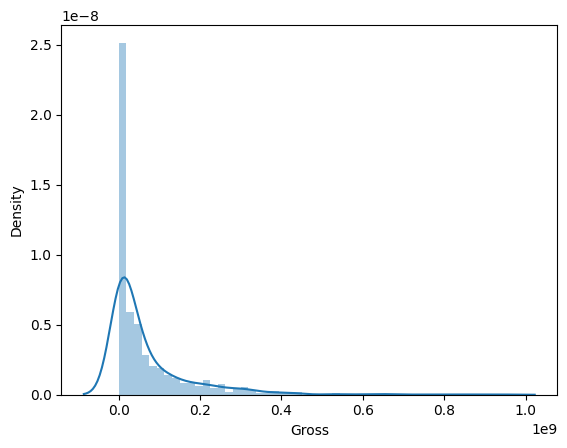

In [21]:
ax = sns.distplot(df['Gross'])

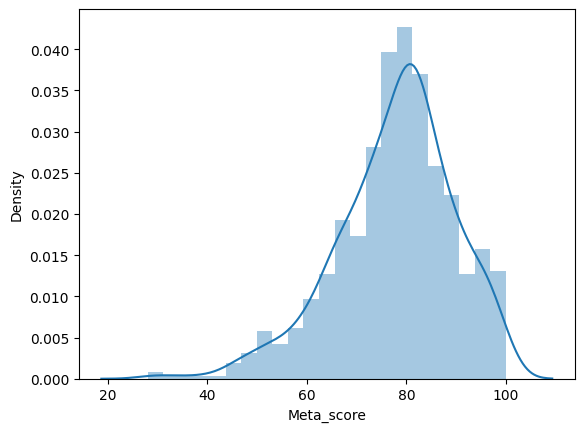

In [22]:
ax = sns.distplot(df['Meta_score'])

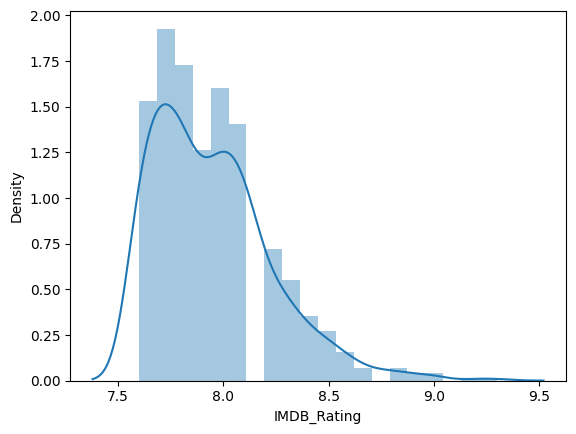

In [23]:
ax = sns.distplot(df['IMDB_Rating'])

### Fine Tuning Parameters

In [24]:
obj=['Certificate','Genre','Director']

In [25]:
cols_to_std = ['Runtime','Released_Year','Gross','Meta_score','No_of_Votes']

In [26]:
target = df['IMDB_Rating']

In [28]:
dummies = pd.get_dummies(df[obj],drop_first=True)
df_dummies = pd.concat([df[cols_to_std],dummies],axis=1)
df_dummies.dtypes

Runtime                         int32
Released_Year                   int32
Gross                           int32
Meta_score                    float64
No_of_Votes                     int64
                               ...   
Director_Yoshiaki Kawajiri       bool
Director_Yôjirô Takita           bool
Director_Zack Snyder             bool
Director_Zaza Urushadze          bool
Director_Zoya Akhtar             bool
Length: 669, dtype: object

In [29]:
df_dummies.head(3)

,Runtime,Released_Year,Gross,Meta_score,No_of_Votes,Certificate_Approved,Certificate_G,Certificate_GP,Certificate_PG,Certificate_PG-13,...,Director_Woody Allen,Director_Xavier Dolan,Director_Yann Samuell,Director_Yash Chopra,Director_Yimou Zhang,Director_Yoshiaki Kawajiri,Director_Yôjirô Takita,Director_Zack Snyder,Director_Zaza Urushadze,Director_Zoya Akhtar
0,142,1994,28341469,80.0,2343110,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,175,1972,134966411,100.0,1620367,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,152,2008,534858444,84.0,2303232,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
df.columns

Index(['Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating',
       'Meta_score', 'Director', 'No_of_Votes', 'Gross'],
      dtype='object')

In [31]:
df.drop('Certificate',axis=1,inplace=True)
df.drop('Genre',axis=1,inplace=True)
df.drop('Director',axis=1,inplace=True)
df.drop('No_of_Votes',axis=1,inplace=True)
df.drop('IMDB_Rating',axis=1,inplace=True)

### Splitting for train and test

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,target,test_size=0.33)

### Applying XGBRegression

In [33]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
model = XGBRegressor()
model.fit(X_train, y_train)
z = model.predict(X_test)
output = pd.DataFrame({'Predicted':z})

### Metrics

In [34]:
mae = mean_absolute_error(y_test, z)
mse = mean_squared_error(y_test, z)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.2239283241494729
Mean Squared Error (MSE): 0.08574849628854463
Root Mean Squared Error (RMSE): 0.2928284417343108


### Exporting Model for usage in Website

In [ ]:
import pickle

with open('model.pkl','wb') as f:

    pickle.dump(model,f)

### For Testing Purposes

In [35]:
a = pd.DataFrame({'Released_Year':[2015],'Runtime':[124],'Meta_score':[59],'Gross':[1672000000]})

In [36]:
b = model.predict(a)
print(float(b))

8.020896911621094
